This contains code for analyzing the rate of change of invitations and CRS scores over time. It includes functions to check the statistical significance of the data and generate a plot to visualize the rate of change. The code is implemented in Python using libraries such as pandas, numpy, matplotlib, and scipy.stats. The analysis helps understand the trends and relationships between the two variables, providing insights into the performance of the system.

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import median_test
from scipy.stats import f_oneway, shapiro, kruskal, levene, bartlett
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:

#dataset
data = {
    'Date': ['June 8, 2023', 'May 24, 2023', 'April 26, 2023', 'April 12, 2023',
             'March 29, 2023', 'March 23, 2023', 'March 15, 2023', 'January 18, 2023',
             'January 11, 2023'],
    'Invitation_Issues': [4800, 4800, 3500, 3500, 7000, 7000, 7000, 5500, 5500],
    'CRS_Score': [486, 488, 483, 486, 481, 484, 490, 490, 507]
}
df = pd.DataFrame(data)




In [3]:
# Perform the correlation analysis
correlation, p_value = pearsonr(df['Invitation_Issues'], df['CRS_Score'])

print(f"Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")


import pandas as pd

# Create DataFrames for CRS scores and Invitation issues
crs_data = {
    'Date': ['June 8, 2023', 'May 24, 2023', 'April 26, 2023', 'April 12, 2023',
             'March 29, 2023', 'March 23, 2023', 'March 15, 2023', 'January 18, 2023',
             'January 11, 2023'],
    'CRS_Score': [486, 488, 483, 486, 481, 484, 490, 490, 507]
}

issues_data = {
    'Date': ['June 8, 2023', 'May 24, 2023', 'April 26, 2023', 'April 12, 2023',
             'March 29, 2023', 'March 23, 2023', 'March 15, 2023', 'January 18, 2023',
             'January 11, 2023'],
    'Invitation_Issues': [4800, 4800, 3500, 3500, 7000, 7000, 7000, 5500, 5500]
}

crs_df = pd.DataFrame(crs_data)
issues_df = pd.DataFrame(issues_data)

# Perform the median test
statistic, p_value, medians, _ = median_test(crs_df['CRS_Score'], issues_df['Invitation_Issues'])

print(f"Median Test Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")


Correlation: 0.03
P-value: 0.9475
Median Test Statistic: 14.22
P-value: 0.0002


In [4]:
# Relevant Libraries



def check_statistical_significance(df, filter_column, value_column, threshold=0.05):
    """ Function to check the statistical significance of a column in a dataframe"""
    
    temp_df = df[value_column].values
    display_name = filter_column.title()
    
    # check normality
    normality = shapiro(temp_df)[1] < threshold
    print(f'{display_name} is not Normally Distributed' if normality else f'{display_name} is Normally Distributed')
    
    # check homoscedasticity
    variance_test = levene if normality else bartlett
    if filter_column:   _, p = variance_test( *[df[df[filter_column]==key][value_column].values for key in df[filter_column].unique()] ) 
    else:               _, p = variance_test(temp_df)
    homoscedasticity = p < threshold
    print(f"{display_name} doesn't have same variance." if homoscedasticity else f'{display_name} has same variance')
    
    # check significance
    significance_test, population_type = (f_oneway, "Means") if normality & homoscedasticity else (kruskal, "Medians") 
    if filter_column:   _, p = significance_test( *[df[df[filter_column]==key][value_column].values for key in df[filter_column].unique()] )
    else:               _, p = significance_test(temp_df) 
    significance = p < threshold
    print(f"{display_name} {population_type} is statistically significant." if significance else f'{display_name} {population_type} is not statistically significant')
    
check_statistical_significance(df, 'Invitation_Issues', 'CRS_Score')


Invitation_Issues is not Normally Distributed
Invitation_Issues doesn't have same variance.
Invitation_Issues Means is not statistically significant


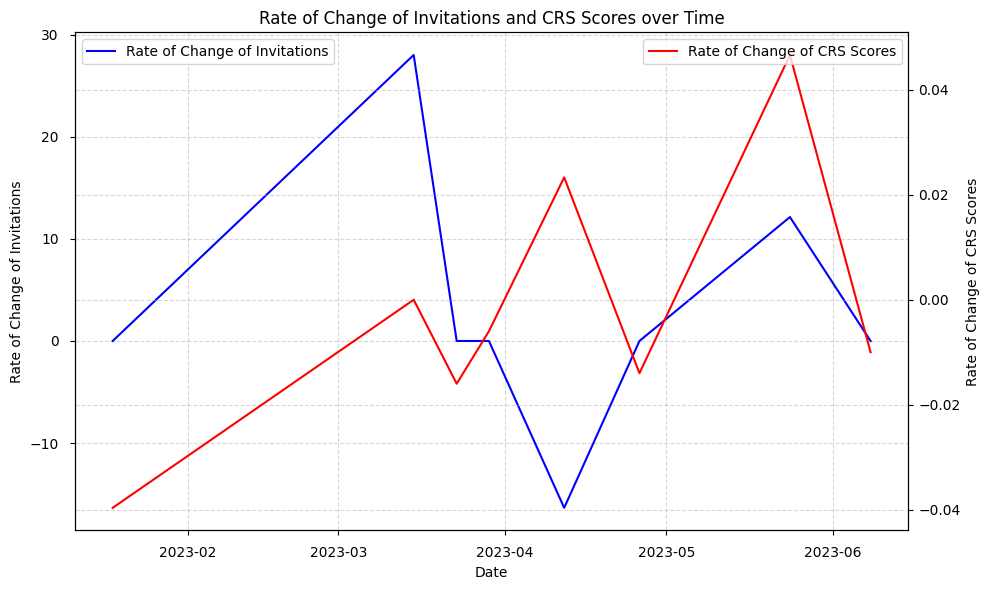

In [5]:


# Dataset
dates = ['June 8, 2023', 'May 24, 2023', 'April 26, 2023', 'April 12, 2023', 'March 29, 2023',
         'March 23, 2023', 'March 15, 2023', 'January 18, 2023', 'January 11, 2023']
invitation_issues = [4800, 4800, 3500, 3500, 7000, 7000, 7000, 5500, 5500]
crs_scores = [486, 488, 483, 486, 481, 484, 490, 490, 507]

# Sort the data in ascending order of dates
df = pd.DataFrame({'Date': dates, 'Invitation_Issues': invitation_issues, 'CRS_Score': crs_scores})
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Calculate rate of change for invitations
quota_size = 3000
date_intervals = np.diff(df['Date']).astype('timedelta64[D]').astype(int)
invitation_rate_of_change = [(df['Invitation_Issues'][i] - df['Invitation_Issues'][i-1]) / quota_size * date_intervals[i-1]
                             for i in range(1, len(df))]

# Calculate rate of change for CRS scores
crs_rate_of_change = [(df['CRS_Score'][i] - df['CRS_Score'][i-1]) / quota_size * date_intervals[i-1]
                      for i in range(1, len(df))]

# Create graph
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figsize as per your preference

# Plot rate of change of invitations
ax1.plot(df['Date'][1:], invitation_rate_of_change, 'b-', label='Rate of Change of Invitations')

# Add secondary y-axis for rate of change of CRS scores
ax2 = ax1.twinx()
ax2.plot(df['Date'][1:], crs_rate_of_change, 'r-', label='Rate of Change of CRS Scores')

# Labels and legend
ax1.set_xlabel('Date')
ax1.set_ylabel('Rate of Change of Invitations')
ax2.set_ylabel('Rate of Change of CRS Scores')

# Move ax1 legend outside the plot area
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Move ax2 legend outside the plot area
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Title and axis labels
plt.title('Rate of Change of Invitations and CRS Scores over Time')
plt.xticks(rotation=45)
ax1.tick_params(axis='x', which='major', pad=8)
ax1.tick_params(axis='y', which='major', pad=8)

# Grid lines
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
fig.tight_layout()

plt.show()
